In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
import os




# 웹 크롤링
## 크롤링
+ 웹 데이터를 읽어오는 방법으로 스크레이핑과 크롤링이 있다.
+ 스크레이핑(scraping)은 웹 사이트의 특정 정보를 추출하는 것으로 웹 데이터의 구조 분석이 필요, 로그인이 필요한 경우가 많음
+ 크롤링은 프로그램으로 자동으로 (보통 정기적으로) 웹사이트를 돌며 정보를 추출하는 것을 말한다. 이러한 작업을 수행하는 프로그램을 크롤러, 스파이더라고 함

### 네이버 실시간 검색어
+ 다음과 같이 간단히 네이버 실시간 검색어를 조회할 수 있다.

In [26]:
import re
import requests

#print(requests.get('https://www.naver.com/').text)
# 정규표현식 참고
re.findall("""<span class="blind">(.*?)</span>""",requests.get('https://www.naver.com/').text)[:20]

['NAVER whale',
 '네이버',
 '쥬니어네이버',
 '해피빈',
 '검색',
 '한글 입력기',
 '자동완성 레이어',
 '리스트형',
 '썸네일형',
 '설정',
 '이전',
 '다음',
 '닫기',
 '닫기',
 '이전',
 '다음',
 '닫기',
 '닫기',
 '이전',
 '다음']

In [37]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36'}
print(requests.get("https://datalab.naver.com/keyword/realtimeList.naver",headers= headers).text)
re.findall("""<span class="item_title">(.*?)</span>""", requests.get("https://datalab.naver.com/keyword/realtimeList.naver", headers = headers).text)

## 크롤링 참고 https://blog.naver.com/kiddwannabe/221185808375

<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=1200">
    <title>급상승검색어 : 네이버 데이터랩</title>
    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202010150900/css/datalab.css">
    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202010150900/css/graph.css">

    <link rel="icon" sizes="192x192" href="https://ssl.pstatic.net/static.datalab/202010150900/img/favicon/android_legacy_xxxhpdi_192x192.png" >
    <link rel="icon" sizes="144x144" href="https://ssl.pstatic.net/static.datalab/202010150900/img/favicon/android_legacy_xxhpdi_144x144.png" >
    <link rel="icon" sizes="96x96" href="https://ssl.pstatic.net/static.datalab/202010150900/img/favicon/android_legacy_xhdpi_96x96.png" >
    <link rel="icon" sizes="72x72" href="https://ssl.pstatic.net/static.datalab/202010150900/img/favicon/android_legacy_hdpi_

['송재호',
 '지진',
 '몰타',
 '국군간호사관학교',
 '상주 지진',
 '탑건',
 '클로버필드 10번지',
 '전북 울산',
 '툼레이더',
 '롯데마트 휴무일',
 '대전 멧돼지',
 '홈플러스 휴무일',
 '이마트 트레이더스 휴무일',
 '이마트 휴무일',
 '이은형',
 '안나린',
 '대형마트 휴무일',
 '정근우',
 '김창준',
 '인기가요']

## json

In [27]:
import json, requests
from pandas.io.json import json_normalize
r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text),['data','data'])

<ipython-input-27-a7995ec58cd6>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(json.loads(r.text),['data','data'])


,rank,keyword,change,score,tvalue,cvalue,ratio,delta
0,1,송재호,+,0,0,0,.,0
1,2,숙환,+,0,0,0,.,0
2,3,지진,+,0,0,0,.,0
3,4,국군간호사관학교,+,0,0,0,.,0
4,5,탑건,+,0,0,0,.,0
5,6,몰타,+,0,0,0,.,0
6,7,전북 울산,+,0,0,0,.,0
7,8,툼레이더,+,0,0,0,.,0
8,9,클로버필드 10번지,+,0,0,0,.,0
9,10,롯데마트 휴무일,+,0,0,0,.,0


## urllib
url 관련 데이터를 처리하는 라이브러리로 http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용한다.
이를 이용하여 웹에서 파일 다운로드 하는 예

In [38]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename="data/test.png"
urllib.request.urlretrieve(url,savename)


('data/test.png', <http.client.HTTPMessage at 0x215f1649280>)

위에서 urlretrive()를 사용하여 데이터를 파일에 바로 저장하였다.
urlopen()을 사용하면 데이터를 파이썬에서 읽을 수 있다.

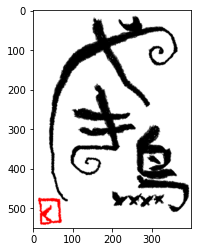

In [39]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))

In [41]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read()# 바이너리 데이터를 문자열로 반환
text = data.decode("utf-8")
print(text)
print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=210.119.34.1
REMOTE_HOST=cs21.sunmoon.ac.kr
REMOTE_PORT=45218
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.8
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=210.119.34.1\nREMOTE_HOST=cs21.sunmoon.ac.kr\nREMOTE_PORT=45218\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.8\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


## 기상청 데이터 읽기
### 기상청 웹 사이트
+ 기상청의 정보를 보여주는 웹 API 사이트에 접속하고 파라미터를 전송하여 데이터를 읽는 예
+ 파라미터를 설정하여 109: 서울 경기지역을 선택함

In [42]:
import urllib.parse
API = "http://kma.go.kr/weather/forecast/mid-term-rss3.jsp"
#서울 경기 지역 선택
values = {
    'stdId': '109'
}
params = urllib.parse.urlencode(values)
url = API + "?" + params
print("url=", url)
data = urllib.request.urlopen(url).read()
#바이너리 데이터를 문자열로 반환
text = data.decode("utf-8")
print(text)

url= http://kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2020년 11월 08일 (일)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2020년 11월 08일 (일)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202011080600</tm>
		<wf><![CDATA[○ (기온) 아침기온은 11일(수)~12일(목) -2~9도로 어제(7일 7~17도)보다 낮아 춥겠고, 그 밖의 날은 3~11도로 어제보다 조금 낮겠습니다. <br />          낮 기온은 13~20도로 어제(7일 17~23도)보다 조금 낮겠습니다.   <br />○ (건조) 이번 예보기간 동안 대체로 맑은 날씨가 이어지면서 대기가 건조하겠으니, 산불 등 화재 예방에 유의하기 바랍니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<province>서울ㆍ인

## get 사용
GET 요청을 사용하여 파라미터를 보내려면 URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가할 수 있다. 여러 개의 파라미터를 보내는 경우 & 를 사용하여 구분한다.

한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다.

쥬피터가 아니라 파이썬 실행 명령을 사용하는 경우 아래와 같이 입력한다.

python3 forecase.py 108

아래는 키보드에서 파라미터를 입력받는 방법을 사용하였다.

윈도우 명령어 참고 https://zetawiki.com/wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_CMD_%EB%AA%85%EB%A0%B9%EC%96%B4_%EB%AA%A9%EB%A1%9D

In [43]:
# import sys
# import urllib.parse as parse
# import urllib.request as req

# if len(sys.argv)<=1:
#     print("python3 forecase.py 지역번호")
#     sys.exit()
# regionNumber = sys.argv[1]
# API = "http://kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# #서울 경기 지역 선택
# values = {
#     'stdId': '109'
# }
# params = urllib.parse.urlencode(values)
# url = API + "?" + params
# print("url=", url)
# data = urllib.request.urlopen(url).read()
# #바이너리 데이터를 문자열로 반환
# text = data.decode("utf-8")
# print(text)